In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint

file = "BradleyMeltingPointDataset.xlsx"
data = pd.read_excel(file, usecols = ['smiles','mpC'])

print ("the number of data point is ", data.shape)


fp_case = 0
fp_len = 128

the number of data point is  (28645, 2)


In [2]:
all_smiles = data['smiles'].values
all_y = data['mpC'].values

print ("THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:")

smiles = []
y = []
for idx in range(len(all_smiles)):
    tsmiles = all_smiles[idx]
    tmol = Chem.MolFromSmiles(tsmiles, sanitize=False)
    problems = Chem.DetectChemistryProblems(tmol)
    if (len(problems)>0):
        print (tsmiles)
    else:
        smiles.append(tsmiles)
        y.append(all_y[idx])

THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:


RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 22 23 24
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7 8 10 11 12 13 15 16 17 19
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 7 8 9 11 12 13 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 21 22 23
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [17:58:08] Explicit valence for atom # 20 C, 5, is greater than permitted


[Cl+3]([O-])([O-])([O-])[O-].o1c2[c+]cc(C)c3cc(oc3c2c2cc(OC)ccc12)C
Brc1cc2c3c(oc2c(Br)c1)[c+]cc(C)c1cc(oc13)C.[Cl+3]([O-])([O-])([O-])[O-]
Clc1ccc2oc3[c+]cc(C)c4cc(oc4c3c2c1)C.[Cl+3]([O-])([O-])([O-])[O-]
[Cl+3]([O-])([O-])([O-])[O-].o1c2[c+]cc(C)c3cc(oc3c2c2cc(C)ccc12)C
[Cl+3]([O-])([O-])([O-])[O-].o1c2[c+]cc(C)c3cc(oc3c2c2ccccc12)C
[P+](c1ccccc1)(c1ccccc1)(c1ccccc1)C(=C=1C=CC=CC=1)c1ccccc1


RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekuliz

O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
CCN(CC)C(=O)[C@@H]2C=C1c3cccc4ncc(C[C@H]1N(C)C2)c34
O=C2c1ncnc1N(C)C(=O)N2C
c1cnnn1
Nc1ncnn1
c1cccc2ncnc12
Sc1nc2ccccc2n1
c1cccc2nnnc12
c1cncn1
c1cccc2nccc12
c1cccn1
n1c3ccccc3nc1c2cscn2
[O-][N+](=O)c1cnc(C)n1
Brc1cc2c3cc(Br)ccc3nc2cc1
Cc2cnc1ccccc12
Clc1cc2nc(C)nc2cc1
Cc1cc2nnnc2cc1
[O-][N+](=O)c1ccc2ncnc2c1
c1cccc2nc3ccccc3c12
COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
O=C(O)[C@@H](NC(C)=O)Cc2cnc1ccccc12
CC(=O)NC(=O)[C@@H](N)Cc2cnc1ccccc12
n2cnc(NCc1ccccc1)c3ncnc23
Cc1cnnc1
CCNC(=O)N(CCCN(C)C)C(=O)[C@@H]1C[C@@H]2c3cccc4ncc(C[C@H]2N(C1)CC=C)c34
O=C(O)[C@H](C(C)C)N(Cc1ccc(cc1)c2ccccc2c3nnnn3)C(=O)CCCC
CN=C(/NC#N)NCCSCc1ncnc1C
CCN(CC)CCc2cnc1ccccc12
CNS(=O)(=O)Cc1cc2c(cc1)ncc2CCN(C)C
CC=5OC(=O)OC=5COC(=O)c4c(nc(CCC)n4Cc1ccc(cc1)c3ccccc3c2nnnn2)C(C)(C)O
CN(C)CCc2cnc1ccc(cc12)Cn3cn

RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 10
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 12
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't keku

N#Cc3cncc3c1cccc2OC(F)(F)Oc12
CC(C)NCC(O)COc2cccc1nccc12
Clc1cccc(c1Cl)c2cncc2C#N
Cc3c(OC)c(C)cnc3CS(=O)c1nc2cc(ccc2n1)OC
O=C2c1ncnc1N(C)C(=O)N2C
Nc1nc(N)nc2ncnc12
Cc1cc2c(cc1)nc(C)c2C
N#Cc1cc2ccnc2cc1
Brc1cc2ccnc2cc1
O=C1C(CCc2nc(C)c(CC)c12)CN3CCOCC3
Cc1nnc(Cl)c1[N+](=O)[O-]
[O-][N+](=O)c1cc2ccnc2cc1
Cc1cc2c3ccccc3nc2cc1
FC(F)(F)c2nc1c(ccc(Cl)c1Cl)n2
Brc1cnnc1
Oc1cc2ccnc2cc1
CCc1nc2ccccc2n1
Cc1ncc(C)c1C(=O)C
Cc1ccnn1
c1c(ccc2nccc12)OCc3ccccc3
CC(=O)c1cccn1
Clc2cncc2c1cccc(Cl)c1[N+]([O-])=O
COc1cc2ccnc2cc1
O=Cc1cccn1
c1cccc3c1cc(c2ccccc2)n3
C2CCCc3nc1ccccc1c23
Nc1nc2ccccc2n1
Cc1cncn1
O=C(OCC)Cc2cnc1ccccc12
CC(=O)c2cnc1ccccc12
[O-][N+](=O)c1cnc(C)n1
Cc1nccn1
Cc1cccn1
Cc1ccc(C)n1
c1cccc2nc(nc12)Cc3ccccc3
Cc1ccnc1
Cc1nc2ccccc2n1
Cc1cc2ncnc2cc1
Cc1cc2ccnc2cc1
CC(=O)Oc2cnc1ccccc12
OCCc2cnc1ccccc12
O=P(O)(O)Oc1cccc2c1c(cn2)CCN(C)C
Cc1ncc(C)c1CC
CN(C)CCc2cnc1ccc(O)cc12
O=Cc2cnc1ccccc12
c1ccc(cc1)c2nc(c(n2)c3ccccc3)c4ccccc4
O=C(O)C(NC(=O)CCN)Cc1cncn1
CC(N)Cc2cnc1ccccc12
c1ncnn1
c1cncc2ncnc12
c

RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [17:58:08] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR

CCC(N)Cc2cnc1ccccc12
c1cccn1
Cc1cc2ccccc2n1
c1cccc2nnnc12
[O-][N+](=O)c1cc2ncnc2cc1
Cc1c2ccccc2nc1C
CN(C)Cc2cnc1ccccc12
c1cccc2nc3ccccc3c12
Cc2cnc1ccccc12
Cc1cc(C)nn1
CN(C)CCc2cnc1ccccc12
CNCCc2cnc1ccccc12
c1cccc2ncnc12
COc1cc(cc(OC)c1OC)C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
n1c3ccccc3nc1c2cscn2
O=C(OCC)Oc1c(OC)cc(cc1OC)C(=O)OC2CC3CN4CCc5c6ccc(OC)cc6nc5C4CC3C(C2OC)C(=O)OC
CNS(=O)(=O)Cc1cc2c(cc1)ncc2CCN(C)C
CS(=O)c3ccc(c1nc2ncccc2n1)c(OC)c3
Oc1cc2c(cc1)ncc2CCN
Cc3c(OCCCOC)ccnc3CS(=O)c1nc2ccccc2n1
CN(C)CCc2cnc1cccc(O)c12
CC(C)NCC(O)COc2cccc1nccc12
CSCC4CC1C(Cc2cnc3cccc1c23)N(C4)CCC
O=C(OC)Nc1nc2cc(ccc2n1)OCCC
Cc3c(OC)c(C)cnc3CS(=O)c1nc2cc(ccc2n1)OC
CCC(CO)NC(=O)C4C=C1C(Cc2cnc3cccc1c23)N(C)C4
O=C(OC)Nc1nc2cc(ccc2n1)C(=O)c3ccccc3
CCN(CC)C(=O)C4C=C1C(Cc2cnc3cccc1c23)N(C)C4
OCc4c(Cl)nc(CCCC)n4Cc1ccc(cc1)c2ccccc2c3nnnn3
n1cnc3ncnc3c1NCc2ccco2
CC(C)CN1c2ncnc2C(=O)N(C)C1=O
O=C(O)CCc2cnc1ccccc12
OCc2cnc1ccccc12
O=C(O)CC3(CC)OCCc2c3nc1c(cccc12)CC
CC(CO)N

RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 14 15
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kek

OC(=O)c1ncnc1C(O)=O
c1ccc(cc1)c2nccn2
O=C(O)c2cnc1ccccc12
Cc1cnc(C)n1
Cc1cnc(CC)n1
Cc1cccc2ccnc12
Cc1nc(C)c(C)c1C
Cc1cc2cc(C)nc2cc1
CC(=O)Cc2cnc1ccccc12
CC2NCCc1c3cc(OC)ccc3nc12
CC(C)NCC(O)COc2cccc1nc(C)cc12
c1ccc(cc1)c2cccn2
O=C(O)c1cc2ccccc2n1
O=C(OCC)c1cc2ccccc2n1
[O-][N+](=O)c1cc2nc(C)nc2cc1
Oc2cccc1nccc12
Ic1cnnc1
Nc1cnnc1
Nc1cc2ccnc2cc1
Brc1cnnc1C
Cc1cccc2nccc12
N#Cc3cncc3c1cccc2OC(F)(F)Oc12
Clc1ccc2ccnc2c1
Nc1cc2cnnc2cc1
Clc1cccc(c1Cl)c2cncc2C#N
CC[C@@]23CCc4nc1ccccc1c4CCN(C2)CCC3
Oc1ccc2c3ccccc3nc2c1
O=C(O)C(N)Cc2nnc1ccccc12
Clc2nnc1ccccc12
O=C(OCC)Cc2nnc1ccc(Cl)cc12
Cc1cccc2nnnc12
N#Cc2cnc1ccccc12
Cc1c3ccccc3nc1c2ccccc2
Clc1cc(C)nn1
N#CCc2cnc1ccccc12
O=C(O)C2C(OC)C(O)CC3CN4CCc1c5ccc(OC)cc5nc1C4CC23
O=C(OC)C2(CC4CC(O)(CC)CN(CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C)C8C97CCN6CC=CC(CC)(C67)C(O)C8(O)C(N)=O
COc1cc(cc(OC)c1OC)C(=O)OC2CC3CN4CCc5c6ccccc6nc5C4CC3C(C2OC)C(=O)OC
OCCc3c4ccccc4nc3C2CC1CCN2CC1C=C
O=C(OC)c2cnc1ccccc12
O=C(O)C2C=C1c3cccc4ncc(CC1N(C)C2)c34
CCN(CC)C(=O)C4C=C1C(Cc2c(

RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 20 21 22
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 20 21
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 18
RDKit ERROR: 
RDKit ERROR: [17:58:09] Can't kekulize mol.  Unkekulized atoms: 1 

In [3]:
data = pd.DataFrame(list(zip(smiles, y)), columns = ['smiles', 'mpC'])
data['Mol'] = data['smiles'].apply(Chem.MolFromSmiles)

In [4]:
data.head()

,smiles,mpC,Mol
0,c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0,<rdkit.Chem.rdchem.Mol object at 0x7fce45dde2b0>
1,c1ccc(c(c1)N)N2CCCCC2,46.0,<rdkit.Chem.rdchem.Mol object at 0x7fce456cf170>
2,c1cnc(nc1)N2CCNCC2,33.0,<rdkit.Chem.rdchem.Mol object at 0x7fce16b3cdf0>
3,c1ccc(c(c1)N2CCNCC2)O,125.0,<rdkit.Chem.rdchem.Mol object at 0x7fce44659b70>
4,C1CCC(=CC1)CCN,-55.0,<rdkit.Chem.rdchem.Mol object at 0x7fce45667530>


In [5]:
from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

In [6]:
from sklearn.preprocessing import StandardScaler

def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)


#Scale X to unit variance and zero mean
data['Fingerprint'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case, fp_len=fp_len)

#st = StandardScaler()
#X = np.array(list(data['Fingerprint']))
#X = st.fit_transform(X)
X = np.array(list(data['Fingerprint']))

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


<Figure size 432x288 with 0 Axes>

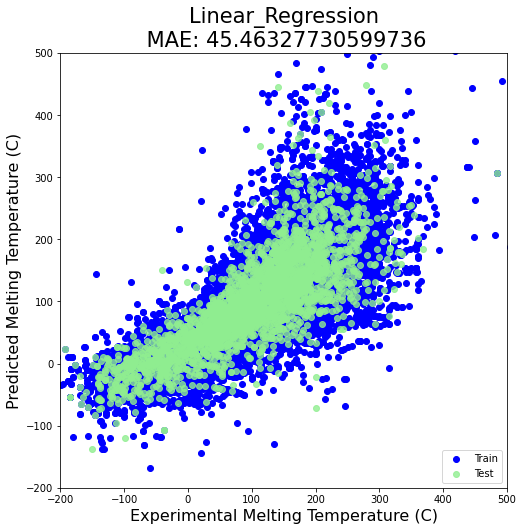

<Figure size 432x288 with 0 Axes>

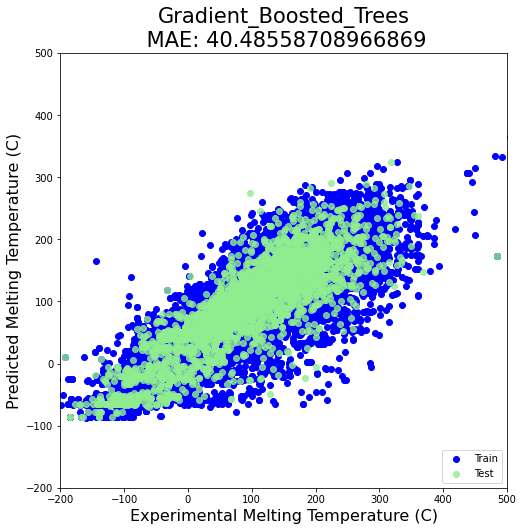

<Figure size 432x288 with 0 Axes>

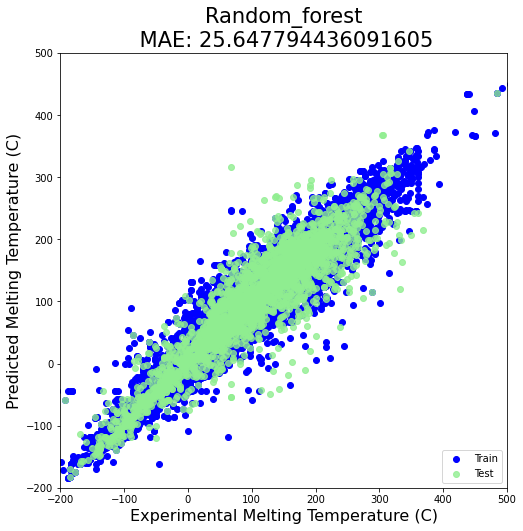

<Figure size 432x288 with 0 Axes>

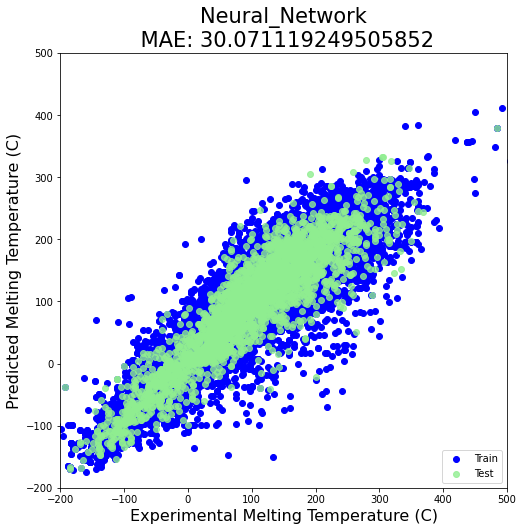

\begin{tabular}{c c c}
           name     &      MAE test err   & .    abs error in CV \\ 
\hline
                 Random_forest & 25.648 & 27.861 \\
                Neural_Network & 30.071 & 32.070 \\
        Gradient_Boosted_Trees & 40.486 & 41.488 \\
             Linear_Regression & 45.463 & 365596.209 \\
\end{tabular}


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.model_selection import cross_val_score

import pickle


def make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, title, figsize, fontsize, fname):    
    plt.clf()
    f = plt.figure(figsize=figsize)
    plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
    plt.title(title,fontsize=fontsize+5)
    plt.xlabel('Experimental Melting Temperature (C)', fontsize=fontsize)
    plt.ylabel('Predicted Melting Temperature (C)', fontsize=fontsize)
    plt.scatter(y_test,y_pred_test,c='lightgreen', label='Test', alpha = 0.8)
    plt.legend(loc=4)
    plt.xlim(-200,500)
    plt.ylim(-200,500)
    plt.show()
    f.savefig(fname+".pdf")

from sklearn.model_selection import train_test_split

def test_models_and_plot(x, y, model_dict, plots, fp_case, fp_len):
    ''' test a bunch of models and print out a sorted list of CV accuracies
        inputs: 
            x: training data features, numpy array or Pandas dataframe
            y: training data labels, numpy array or Pandas dataframe
            model_dict: a dictionary of the form {name : model()}, where 'name' is a string
                        and 'model()' is a scikit-learn model object. 
    '''

    mean_scores = {}
    percent_errors = {}
    
    for (name, model) in model_dict.items():
        #print("running %s" % name)
        scores = cross_val_score(model, x, y, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')
        scores = -1*scores
        mean_score = scores.mean()
        mean_scores[name] = mean_score

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
        model.fit(X_train, y_train)
        # save the model to disk
        filename = name + "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
        pickle.dump(model, open(filename, 'wb'))
        
        y_pred_train = model.predict(X_train)
        y_pred_test  = model.predict(X_test)
        percent_error = np.mean( np.abs(y_test -y_pred_test) )
        percent_errors[name] = percent_error

        fulltitle = name+'\n MAE: '+str(percent_error)

        if plots:
            fname = name + "_" + str(fp_case) + "_" + str(fp_len)
            make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, fulltitle, (8,8), 16, fname)

    sorted_names = sorted(percent_errors, key=mean_scores.__getitem__, reverse=False)

    print("\\begin{tabular}{c c c}")
    print("           name     &      MAE test err   & .    abs error in CV \\\\ ")
    print("\\hline")
    for i in range(len(sorted_names)):
        name = sorted_names[i]
        print("%30s & %5.3f & %5.3f \\\\" % (name, percent_errors[name], mean_scores[name]))
    print("\\end{tabular}")


alpha_grid = {'alpha': np.logspace(1e-11,1e-1,8)}

model_dict = {
            'Linear_Regression': LinearRegression(),
            #'Kernel Ridge Regression': KernelRidge(),
            #'Ridge Regression':Ridge(),
            #'Gaussian Process Regressor': GaussianProcessRegressor(normalize_y=True),
            #'Support Vector Regression': SVR(),
            #'KNeighborsRegressor': KNeighborsRegressor(),
            'Gradient_Boosted_Trees': GradientBoostingRegressor(n_estimators=100),
            'Random_forest': RandomForestRegressor(),
            'Neural_Network': MLPRegressor(alpha=100,max_iter=8000, hidden_layer_sizes=[80,60], early_stopping=False)
            }

test_models_and_plot(X, y, model_dict, plots=True, fp_case=fp_case, fp_len=fp_len)